# Introduction to Decision Tree and Implementation in Python

Decision tree is one of easiest methods to understand and very powerful also in many cases. In this course, we will understand the basic concepts of Decision Tree and later will expand it to Bagging and Boosting. 

I found this artcile very useful and one can go and read it to understand Decision tree in detail.

https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

### Formation of Decision Tree

![Decision Tree Imaeg](https://miro.medium.com/max/450/1*XMId5sJqPtm8-RIwVVz2tg.png)

As name suggests, decision tree is combination of many individual decisions (branches) and their outcome. You can understand from above image how Survived and Not-survived cases are being identified using few crietria.

The nodes where the tree bifurcated further are called decision node and last branches are called leaf node. 

#### Greedy Algorithm and Information Gain

At the begining, the algorithm will select all available features and choose the one which has minimum cost. We also call them "Entropy" and "Gini Index". 

In other way, we can understand using concept called "Information Gain". Here, the idea is to make more balance child nodes so that it provides better classification. 

![Information Gain](https://s3-ap-southeast-1.amazonaws.com/he-public-data/high%20information%20gaine8d3940.png)


To define information gain precisely, we need to define a measure commonly used in information theory called entropy that measures the level of impurity in a group of examples. Mathematically, it is defined as:

$$Entropy = \sum_{i = 1}{^n} -p \log (p _{i})$$

To illustrate, suppose S is a sample containing 14 boolean examples, with 9 positive and 5 negative examples. Then, the entropy of S relative to this boolean classification is:

Entropy ([9+, 5-]) = -(9/14)$\cdot log_2$(9/14) - (5/14)$\cdot log_2$(5/14) = 0.940

###### Information Gain

$$ Information Gain  = Entropy(parent node) - Average Entropy(children) $$




### Classification using Decision Tree

We will use the Logistic Regression Dataset. Feel free to check my Logistic Code to understand the dataset.

In [1]:
### Importing important libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Import sklearn libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
## importing dataset

train = pd.read_csv("Data/Classification_Train.csv")

In [3]:
### As we are dealing with boolean output either 0 or 1, we will subset the dataset for have these 2 kind of outputs only.
### We won't do it in real world and try to implement any other ML method which can deal with multi-classifiers 

train = train[train['price_range'].isin([0,1])]
train.shape

(1000, 21)

In [4]:
### Let's split the data into X and y

X = train.iloc[:,:len(train.columns)-1]
y = train.iloc[:,len(train.columns)-1]
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0


In [5]:
### Let's split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train.shape

(700, 20)

In [6]:
## printing decision tree class
print(DecisionTreeClassifier())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


You can see the default sets. In first run, we will use the default sets but change the criterion = 'entropy' only. 

In [7]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy')
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred = tree_clf.predict(X_test)

In [9]:
## Checking accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(tree_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [10]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[136  20]
 [  7 137]]


In [11]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       156
           1       0.87      0.95      0.91       144

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



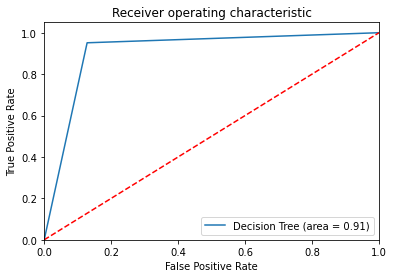

In [12]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DecisionTree_roc_auc = roc_auc_score(y_test, tree_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DecisionTree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

You can observe that the model accuracy has significantly increased from 85% to 91% in Decision tree. We used the default settings only. Let's try GridSearchCV and see if it imporves further. 

### Decision Tree using GridSearch and Regularization

In [13]:
## Importing GridSearch

from sklearn.model_selection import GridSearchCV

lr = DecisionTreeClassifier()

parameters = {
    'max_leaf_nodes' : list(range(2,100)), ##Passing regularization values in a list
    'min_samples_split' : [2,3,4]
    
}

#https://www.dezyre.com/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python

In [14]:
d_tree = DecisionTreeClassifier()
tree_clf_cv = GridSearchCV(d_tree,parameters, cv =5 )
tree_clf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12

In [15]:
## Printing best estimator
tree_clf_cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
## Predicting using the new model

model = tree_clf_cv.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [17]:
### Building confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[150   6]
 [ 16 128]]


In [18]:
### Printing classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       156
           1       0.96      0.89      0.92       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



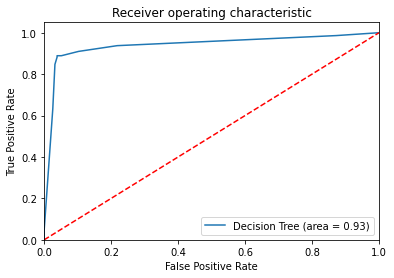

In [20]:
### Printing ROC curve The receiver operating characteristic (ROC)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
DecisionTree_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % DecisionTree_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In this GridSerach method, our model accuracy remains same but there is a change in Precision and Recall. Precision and Recall are always in trade-off. To increase one, we have to compromise with another. 